<a href="https://colab.research.google.com/github/joaoocker/joaoocker/blob/main/Penguin_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [3]:
#abrir dataset do seaborn
df = sns.load_dataset(name='penguins')

In [4]:
df.head(100)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
95,Adelie,Dream,40.8,18.9,208.0,4300.0,Male
96,Adelie,Dream,38.1,18.6,190.0,3700.0,Female
97,Adelie,Dream,40.3,18.5,196.0,4350.0,Male
98,Adelie,Dream,33.1,16.1,178.0,2900.0,Female


In [5]:
df.dtypes

,0
species,object
island,object
bill_length_mm,float64
bill_depth_mm,float64
flipper_length_mm,float64
body_mass_g,float64
sex,object


In [6]:
#tamanho da base
df.shape

(344, 7)

In [7]:
#verificacao da base
df.isna().sum()

,0
species,0
island,0
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,11


In [8]:
#Contar duplicatas
df.duplicated().sum()

0

In [9]:
#dropar duplicatas
df = df.drop_duplicates()

In [10]:
#analise descritiva
df.describe(include='all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,333
unique,3,3,NaN,NaN,NaN,NaN,2
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,Male
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


In [11]:
df['sex']= df['sex'].fillna('Male')

In [12]:
lista = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
for i in lista:
  df[i] = df[i].fillna(df[i].mean())

print(df.isna().sum())

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


In [13]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,Male
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,Female
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,Female
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,Male
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,Female


In [14]:
#agrupar por species
df_specie = df.groupby('species')

In [15]:
df_specie.describe()

bill_length_mm                                                    \
                   count       mean       std   min     25%    50%     75%   
species                                                                      
Adelie             152.0  38.825144  2.686991  32.1  36.775  38.80  40.800   
Chinstrap           68.0  48.833824  3.339256  40.9  46.350  49.55  51.075   
Gentoo             124.0  47.475983  3.086123  40.9  45.275  47.25  49.525   

                bill_depth_mm             ... flipper_length_mm         \
            max         count       mean  ...               75%    max   
species                                   ...                            
Adelie     46.0         152.0  18.338495  ...             195.0  210.0   
Chinstrap  58.0          68.0  18.420588  ...             201.0  212.0   
Gentoo     59.6         124.0  14.999606  ...             221.0  231.0   

          body_mass_g                                                   \
                count         mean         std     min     25%     50%   
species                                                                  
Adelie          152.0  3703.958910  458.848798  2850.0  3350.0  3700.0   
Chinstrap        68.0  3733.088235  384.335081  2700.0  3487.5  3700.0   
Gentoo          124.0  5068.965761  508.164382  3950.0  4700.0  5000.0   

                           
              75%     max  
species                    
Adelie     4000.0  4775.0  
Chinstrap  3950.0  4800.0  
Gentoo     5500.0  6300.0  

[3 rows x 32 columns]

In [16]:
df_island = df.groupby('island')

In [17]:
df_island.describe()

bill_length_mm                                                    \
                   count       mean       std   min     25%    50%     75%   
island                                                                       
Biscoe             168.0  45.249535  4.759536  34.5  42.000  45.80  48.700   
Dream              124.0  44.167742  5.953527  32.1  39.150  44.65  49.850   
Torgersen           52.0  39.046576  3.073806  33.5  36.675  38.95  41.175   

                bill_depth_mm             ... flipper_length_mm         \
            max         count       mean  ...               75%    max   
island                                    ...                            
Biscoe     59.6         168.0  15.882447  ...            220.00  231.0   
Dream      58.0         124.0  18.344355  ...            198.00  212.0   
Torgersen  46.0          52.0  18.404830  ...            195.25  210.0   

          body_mass_g                                                    \
                count         mean         std     min      25%     50%   
island                                                                    
Biscoe          168.0  4712.956871  781.516144  2850.0  4200.00  4762.5   
Dream           124.0  3712.903226  416.644112  2700.0  3400.00  3687.5   
Torgersen        52.0  3715.899123  446.044441  2900.0  3343.75  3700.0   

                            
               75%     max  
island                      
Biscoe     5312.50  6300.0  
Dream      3956.25  4800.0  
Torgersen  4000.00  4700.0  

[3 rows x 32 columns]

<Axes: xlabel='species', ylabel='bill_length_mm'>

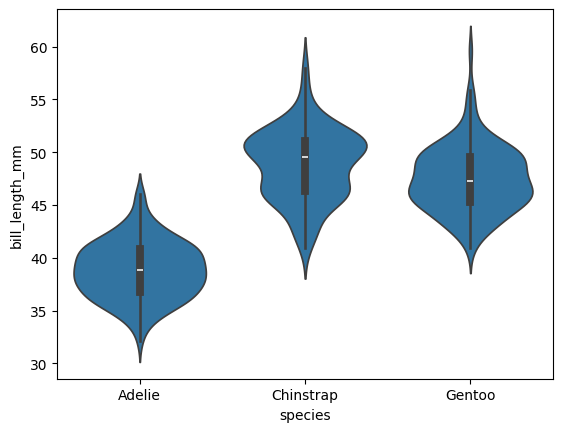

In [18]:
#violin graph to show the species by numerics variables
sns.violinplot(x='species', y='bill_length_mm', data=df)


<Axes: xlabel='species', ylabel='bill_depth_mm'>

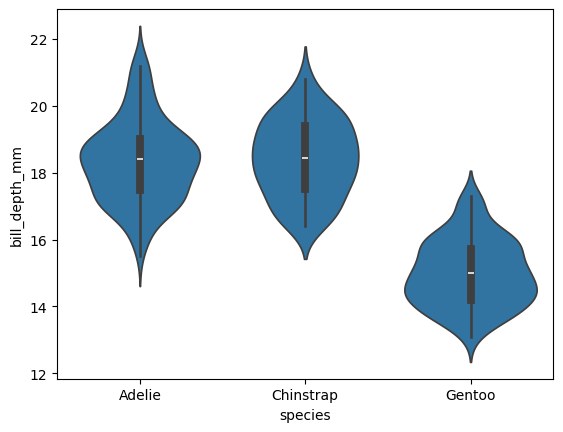

In [19]:
sns.violinplot(x='species', y='bill_depth_mm', data=df)



<Axes: xlabel='species', ylabel='flipper_length_mm'>

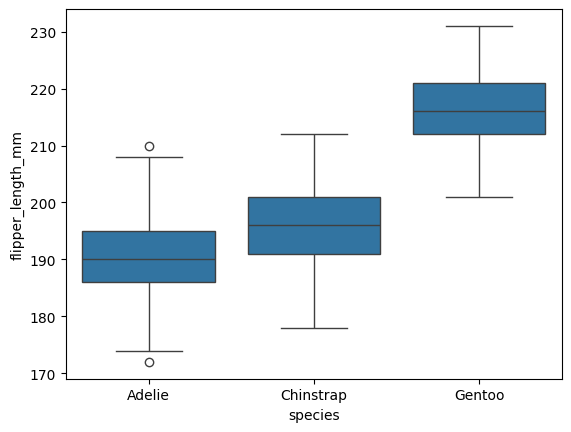

In [20]:
#box plot da flipper length
sns.boxplot(x='species', y='flipper_length_mm', data=df)


<Axes: xlabel='species', ylabel='body_mass_g'>

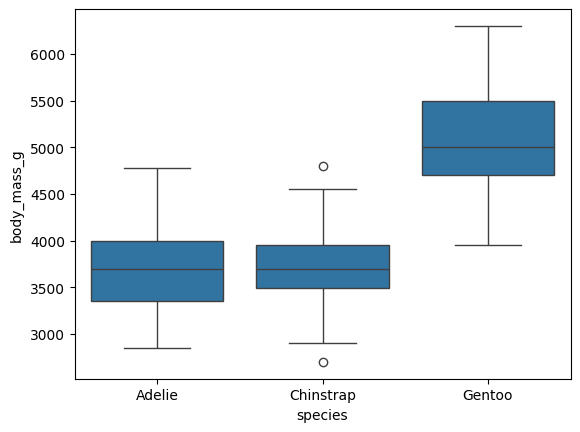

In [21]:
sns.boxplot(x='species', y='body_mass_g', data=df)

<Axes: xlabel='island', ylabel='species'>

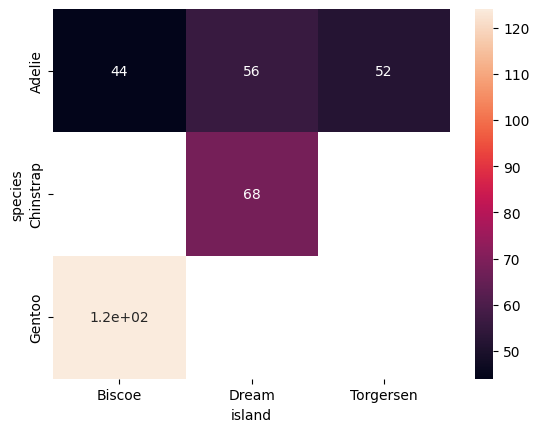

In [22]:
#heatmap with count between species and island
sns.heatmap(df.groupby(['species', 'island']).size().unstack(), annot=True)

<Axes: xlabel='species', ylabel='sex'>

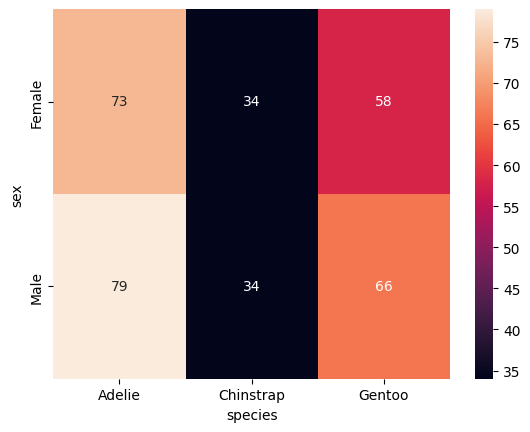

In [23]:
# agrupar por sex e species e fazer um scatter plot
sns.heatmap(df.groupby(['sex','species']).size().unstack(), annot=True)

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

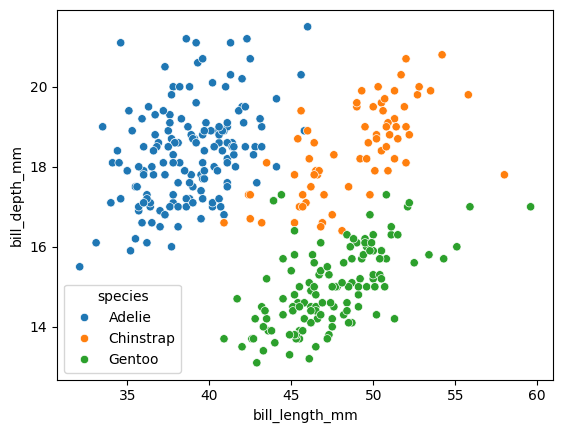

In [24]:
#scatterplot of bill lenght and depht painting for 3 species
sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', hue='species', data=df)

<Axes: xlabel='body_mass_g', ylabel='flipper_length_mm'>

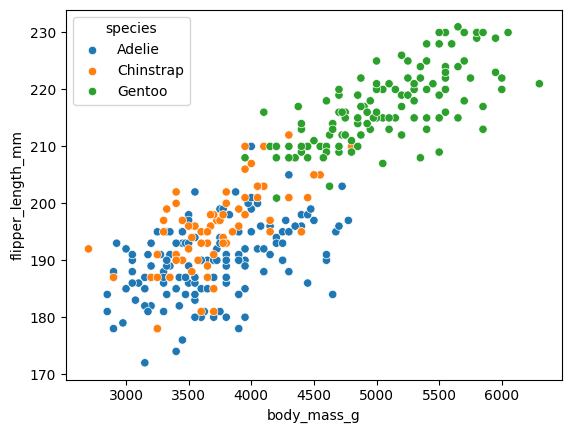

In [25]:
sns.scatterplot(x='body_mass_g', y='flipper_length_mm', hue='species', data=df)

In [26]:
#fazer correlation matrix of the dataframe
df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


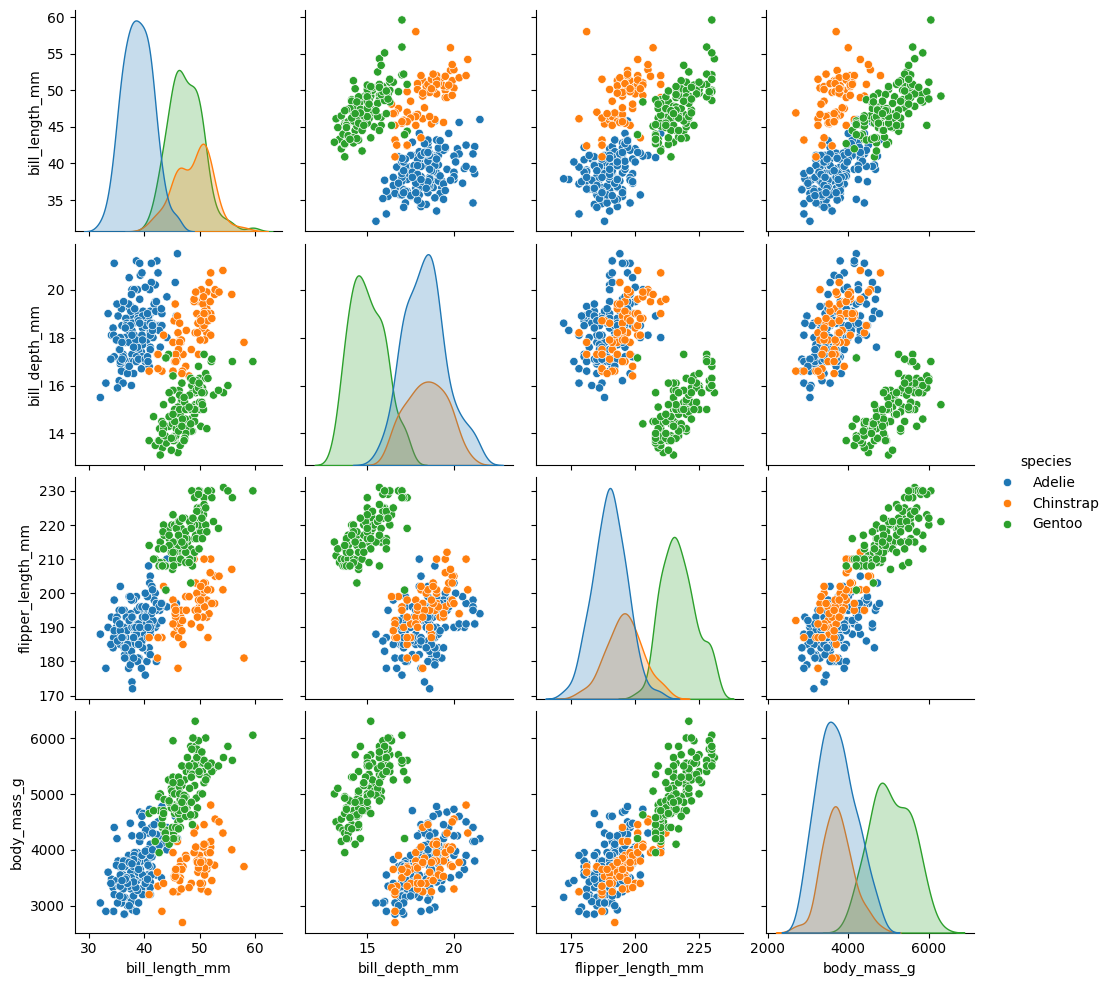

In [27]:
sns.pairplot(df, hue='species')

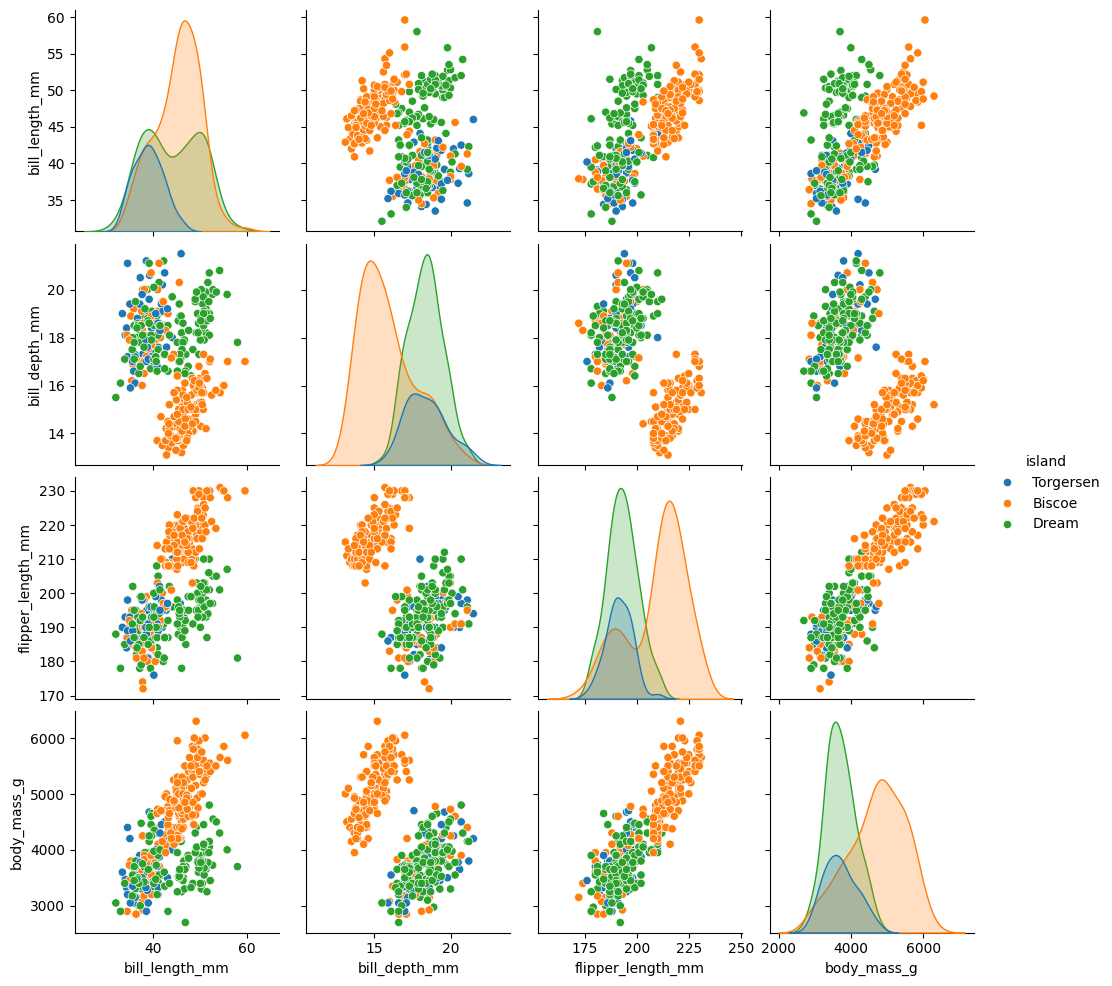

In [28]:
sns.pairplot(df, hue='island')

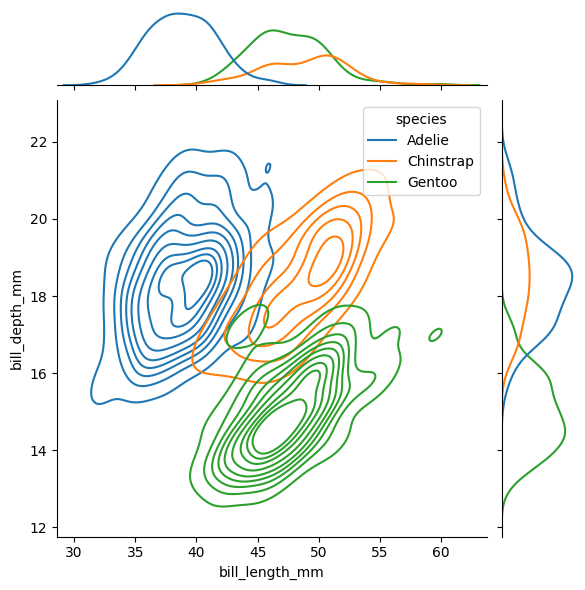

In [29]:
sns.jointplot(x='bill_length_mm', y='bill_depth_mm', data=df, kind='kde', hue='species')

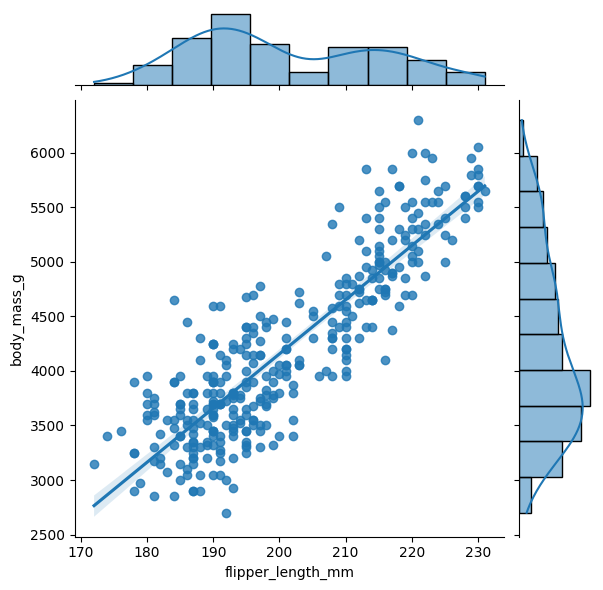

In [30]:
sns.jointplot(x='flipper_length_mm', y='body_mass_g', data=df, kind='reg')

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

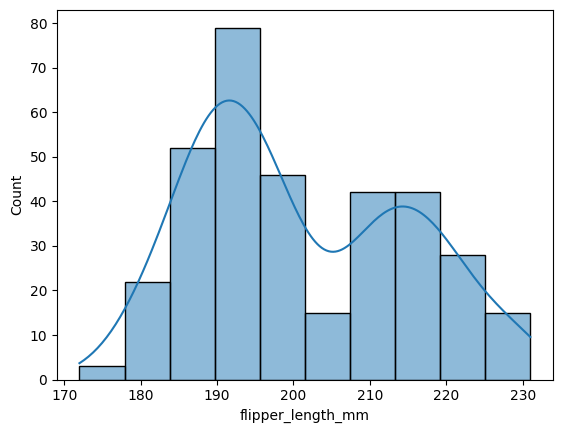

In [31]:
sns.histplot(df['flipper_length_mm'], kde='True')

In [94]:
#lets create a lightxgboost machine learning
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import AUC
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Criar e ajustar o LabelEncoder
le = LabelEncoder()

X=df.drop(['species', 'island', 'sex', 'bill_length_mm', 'body_mass_g', 'flipper_length_mm'], axis=1)
y=df['species']

y = to_categorical(le.fit_transform(y))  # Converte para formato one-hot

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42, stratify=y)


In [95]:
#%% Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [96]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(3, activation='softmax')  # Agora temos 3 neurônios na saída
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [97]:
#%% Compilar o modelo
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # Função de perda para classificação binária
    metrics=[AUC(name='auc')]    # Usar AUC como métrica
)

#%% Resumo do modelo
model.summary()


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_35 (Dense)                     │ (None, 64)                  │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 3)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,899 (11.32 KB)

 Trainable params: 2,899 (11.32 KB)

 Non-trainable params: 0 (0.00 B)

In [98]:
#%% Treinar o modelo
early_stopping = EarlyStopping(
    monitor='val_auc',  # Monitorar a AUC no conjunto de validação
    patience=10,        # Parar após 10 épocas sem melhoria
    mode='max',         # Maximizar a AUC
    restore_best_weights=True  # Restaurar os melhores pesos encontrados
)


In [99]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,          # Número máximo de épocas
    batch_size=32,       # Tamanho do batch
    callbacks=[early_stopping],  # Usar early stopping
    verbose=1
)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 433ms/step - auc: 0.5929 - loss: 1.0899 - val_auc: 0.7092 - val_loss: 1.0818
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - auc: 0.7116 - loss: 1.0813 - val_auc: 0.7516 - val_loss: 1.0746
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - auc: 0.7497 - loss: 1.0739 - val_auc: 0.7867 - val_loss: 1.0672
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - auc: 0.7722 - loss: 1.0651 - val_auc: 0.8128 - val_loss: 1.0616
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - auc: 0.8019 - loss: 1.0595 - val_auc: 0.8133 - val_loss: 1.0570
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - auc: 0.8129 - loss: 1.0545 - val_auc: 0.8354 - val_loss: 1.0513
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - auc: 0.8239 - loss: 1.0484 - val_auc: 0.8430 - val_loss: 1.0451
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - auc: 0.8240 - loss: 1.0418 - val_auc: 0.8509 - val_loss: 1.0385
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - auc: 0.8294 - lo

In [100]:
#%% Avaliar o modelo no conjunto de teste
results = model.evaluate(X_test, y_test, verbose=0)
print(f"AUC no teste: {results[1]:.4f}")


AUC no teste: 0.8999


In [103]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X=df.drop(['body_mass_g','sex','island','species'], axis=1)
y=df['body_mass_g']

# Dividir a amostra em treino (70%) e teste (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar e treinar o modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
print(f"MSE no teste: {mse:.4f}")


MSE no teste: 157117.4984


In [104]:
import statsmodels.api as sm

# Adicionar constante (termo de interceptação)
X = sm.add_constant(X)

# Ajustar o modelo com toda a amostra
model = sm.OLS(y, X).fit()

# Exibir os resultados
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     361.8
Date:                Fri, 14 Feb 2025   Prob (F-statistic):          1.96e-105
Time:                        18:28:20   Log-Likelihood:                -2540.4
No. Observations:                 344   AIC:                             5089.
Df Residuals:                     340   BIC:                             5104.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -6424.7647    559.81

In [105]:
#trasformando em binaria a variavel
df['class'] = df['species'].apply(lambda x: 1 if x == 'Adelie' else 0)

In [108]:
#from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

X=df.drop(['sex','island','species','class'], axis=1)
y=df['class']

# Dividir os dados em treino (70%) e teste (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42, stratify=y)

# Criar e treinar o modelo
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilidades para calcular AUC

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

print(f"Acurácia: {accuracy:.4f}")
print(f"AUC: {auc:.4f}")


Acurácia: 0.9871
AUC: 0.9995


In [109]:
import statsmodels.api as sm

# Adicionar constante (termo de interceptação)
X = sm.add_constant(X)

# Ajustar o modelo com toda a amostra
model = sm.Logit(y, X).fit()

# Exibir os resultados
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.025408
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:                  class   No. Observations:                  344
Model:                          Logit   Df Residuals:                      339
Method:                           MLE   Df Model:                            4
Date:                Fri, 14 Feb 2025   Pseudo R-squ.:                  0.9630
Time:                        18:45:19   Log-Likelihood:                -8.7405
converged:                       True   LL-Null:                       -236.11
Covariance Type:            nonrobust   LLR p-value:                 4.098e-97
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                23.3114     16.857      1.383      0.167      -9.728      56.350
bill_le

In [110]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Definir as variáveis independentes (X)
X = df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']]

# Adicionar constante para a regressão (obrigatório para statsmodels)
X = sm.add_constant(X)

# Calcular VIF para cada variável
vif_data = pd.DataFrame()
vif_data["Variável"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


            Variável         VIF
0              const  700.692517
1     bill_length_mm    1.865090
2      bill_depth_mm    1.611292
3  flipper_length_mm    2.673338


In [115]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que 'df' seja o dataframe original
X = df.drop(['species', 'island', 'sex', 'class'], axis=1)  # Variáveis preditoras
y = df['species']  # Variável alvo

# Converter a variável alvo para números (se ainda não estiver)
le = LabelEncoder()
y = le.fit_transform(y)  # Converte categorias para números

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42, stratify=y)



In [116]:
# Criar o modelo com 100 árvores
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Treinar o modelo
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [117]:
# Previsões no conjunto de teste
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]  # Probabilidade para calcular AUC


🔹 Acurácia: 0.9751

🔹 Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98       106
           1       0.89      1.00      0.94        48
           2       1.00      0.99      0.99        87

    accuracy                           0.98       241
   macro avg       0.96      0.98      0.97       241
weighted avg       0.98      0.98      0.98       241



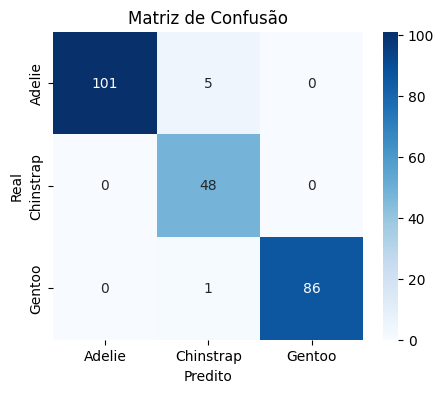

In [118]:
# Acurácia
acc = accuracy_score(y_test, y_pred)
print(f"🔹 Acurácia: {acc:.4f}")

# AUC Score (caso seja um problema binário)
if len(set(y)) == 2:
    auc = roc_auc_score(y_test, y_prob)
    print(f"🔹 AUC: {auc:.4f}")

# Relatório de Classificação
print("\n🔹 Classification Report:")
print(classification_report(y_test, y_pred))

# Matriz de Confusão
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()


In [119]:
from sklearn.model_selection import GridSearchCV

# Definir os hiperparâmetros para testar
param_grid = {
    'n_estimators': [50, 100, 200],  # Número de árvores na floresta
    'max_depth': [None, 10, 20],  # Profundidade máxima das árvores
    'min_samples_split': [2, 5, 10],  # Mínimo de amostras para dividir um nó
    'min_samples_leaf': [1, 2, 4],  # Mínimo de amostras em uma folha
    'bootstrap': [True, False]  # Se usa amostragem com reposição
}

# Criar o modelo base
rf = RandomForestClassifier(random_state=42)

# Configurar o GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           scoring='accuracy', cv=5, n_jobs=-1, verbose=2)

# Treinar o modelo com validação cruzada
grid_search.fit(X_train, y_train)

# Melhor conjunto de hiperparâmetros
print("Melhores parâmetros:", grid_search.best_params_)


Fitting 5 folds for each of 162 candidates, totalling 810 fits
Melhores parâmetros: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [120]:
# Pegar os melhores parâmetros
best_params = grid_search.best_params_

# Criar o modelo otimizado
rf_best = RandomForestClassifier(**best_params, random_state=42)

# Treinar o modelo otimizado
rf_best.fit(X_train, y_train)

# Fazer previsões
y_pred = rf_best.predict(X_test)
y_prob = rf_best.predict_proba(X_test)[:, 1]

# Avaliação do modelo
acc = accuracy_score(y_test, y_pred)
print(f"🔹 Acurácia após otimização: {acc:.4f}")

# AUC Score (caso seja binário)
if len(set(y)) == 2:
    auc = roc_auc_score(y_test, y_prob)
    print(f"🔹 AUC: {auc:.4f}")


🔹 Acurácia após otimização: 0.9834


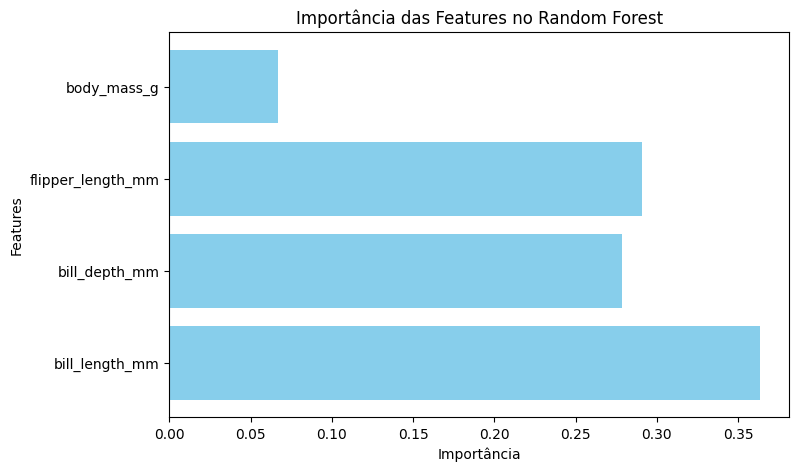

In [121]:
import numpy as np
import matplotlib.pyplot as plt

# Obter a importância das features
feature_importances = rf_best.feature_importances_

# Criar um gráfico de barras
plt.figure(figsize=(8, 5))
plt.barh(X.columns, feature_importances, color='skyblue')
plt.xlabel("Importância")
plt.ylabel("Features")
plt.title("Importância das Features no Random Forest")
plt.show()
